In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# TASK-1

In [ ]:
df=pd.read_csv("C:\\Users\\Admin\\Downloads\\COURSE_9_NIIT\\DS1_C9_S4_Practice_HR_Data.csv")

In [ ]:
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
df.shape

(14999, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# TASK-2

In [ ]:
satisfaction_by_status=df.groupby("left")["satisfaction_level"].mean()
satisfaction_by_status

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

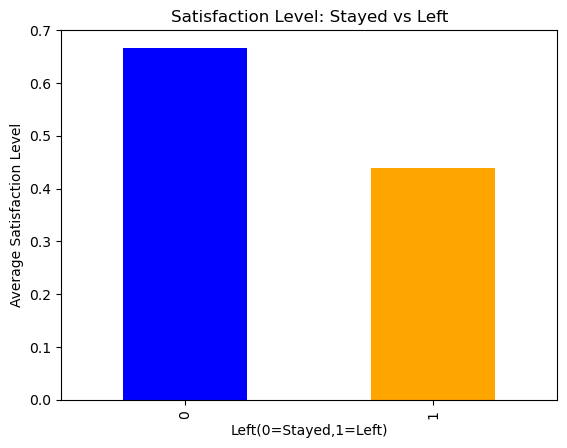

In [ ]:
satisfaction_by_status.plot(kind="bar",color=["blue","orange"])
plt.title("Satisfaction Level: Stayed vs Left")
plt.xlabel("Left(0=Stayed,1=Left)")
plt.ylabel("Average Satisfaction Level")
plt.show()

In [ ]:
hours_by_status=df.groupby("left")["average_monthly_hours"].mean()
hours_by_status

left
0    199.060203
1    207.419210
Name: average_monthly_hours, dtype: float64

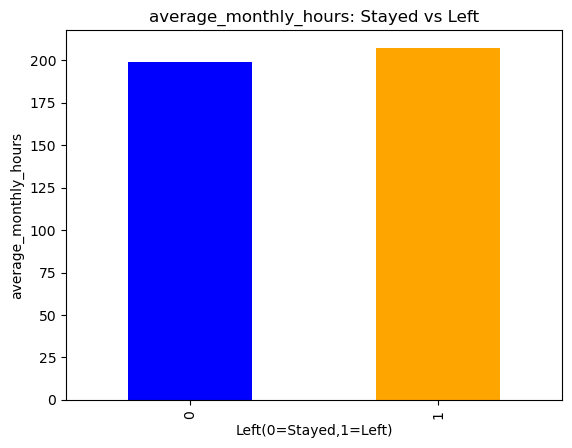

In [ ]:
hours_by_status.plot(kind="bar",color=["blue","orange"])
plt.title("average_monthly_hours: Stayed vs Left")
plt.xlabel("Left(0=Stayed,1=Left)")
plt.ylabel("average_monthly_hours")
plt.show()

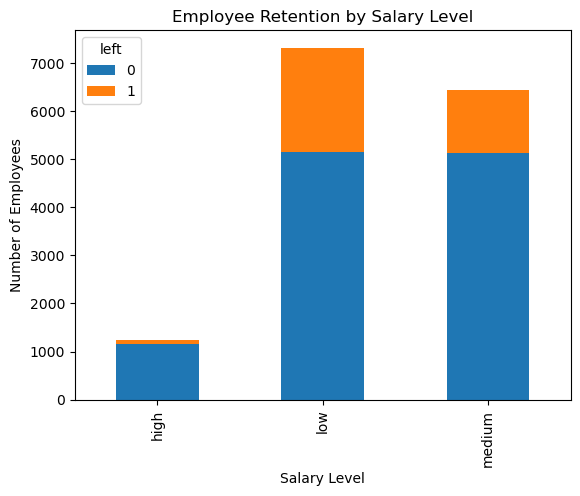

In [ ]:
salary_retention=pd.crosstab(df.salary, df.left)
salary_retention.plot(kind="bar",stacked=True)
plt.title("Employee Retention by Salary Level")
plt.xlabel("Salary Level")
plt.ylabel("Number of Employees")
plt.show()

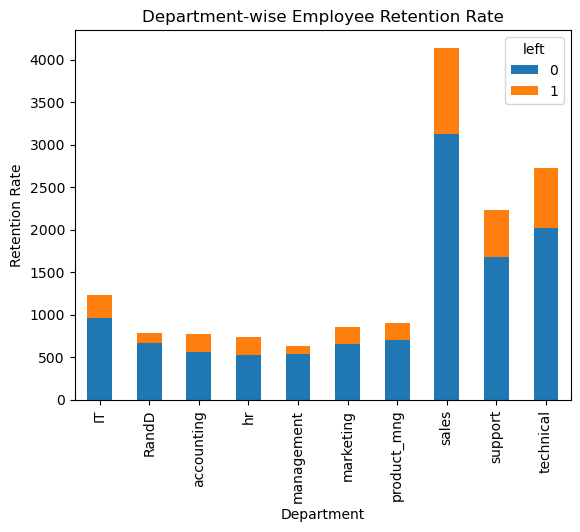

In [ ]:
department_retention=pd.crosstab(df.Department, df.left)
department_retention.plot(kind="bar", stacked=True)
plt.title("Department-wise Employee Retention Rate")
plt.xlabel("Department")
plt.ylabel("Retention Rate")
plt.show()

In [ ]:
bool=['Work_accident', 'left', 'promotion_last_5years']
for i in bool:
    df[i]=df[i].astype("bool")

In [ ]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
Work_accident               bool
left                        bool
promotion_last_5years       bool
Department                object
salary                    object
dtype: object

In [ ]:
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,False,True,False,sales,low
1,0.80,0.86,5,262,6,False,True,False,sales,medium


# TASK-3

In [ ]:
df_conti=df.select_dtypes(include="number")
df_categ=df.select_dtypes(exclude="number")

In [ ]:
df_conti

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3
...,...,...,...,...,...
14994,0.40,0.57,2,151,3
14995,0.37,0.48,2,160,3
14996,0.37,0.53,2,143,3
14997,0.11,0.96,6,280,4


In [ ]:
df_categ.columns

Index(['Work_accident', 'left', 'promotion_last_5years', 'Department',
       'salary'],
      dtype='object')

In [ ]:
# A
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc=preprocessing.LabelEncoder()

In [ ]:
encode= ["Department","salary"]
for i in encode:
    df_categ[i]=enc.fit_transform(df_categ[i].to_numpy().reshape(-1,1))

In [ ]:
df_categ

,Work_accident,left,promotion_last_5years,Department,salary
0,False,True,False,7,1
1,False,True,False,7,2
2,False,True,False,7,2
3,False,True,False,7,1
4,False,True,False,7,1
...,...,...,...,...,...
14994,False,True,False,8,1
14995,False,True,False,8,1
14996,False,True,False,8,1
14997,False,True,False,8,1


In [ ]:
# B
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [ ]:
# C
def Outlier_Treatment(col):
    Q1=df_conti[col].quantile(0.25)
    Q3=df_conti[col].quantile(0.75)
    IQR=Q3 - Q1
    LF=Q1 - (1.5 * IQR)
    UF=Q3 + (1.5 * IQR)
    df_conti.loc[df_conti[col] < LF, col] = round(LF , 0)
    df_conti.loc[df_conti[col] > UF, col] = round(UF , 0)
    return df_conti

for m in df_conti.columns:
    Outlier_Treatment(m)

In [ ]:
for i in df_conti.columns:
    print(i)
    print(df_conti[i].unique())

satisfaction_level
[0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
last_evaluation
[0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
number_project
[2 5 7 6 4 3]
average_monthly_hours
[157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 132 294 134 14

In [ ]:
#D
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
for i in df_conti.columns:
    df_conti[i] = scaler.fit_transform(df_conti[i].to_numpy().reshape(-1,1))

In [ ]:
df_conti.head(2)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.346088
1,0.752814,0.840707,0.971113,1.220423,2.204758


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#E
def cal_vif(vif_df):
    vif = pd.Series(name = "VIF")
    for i in range(0, vif_df.shape[1]):
        vif[vif_df.columns[i]] = variance_inflation_factor(vif_df.values, i)
    return vif

vif_values = cal_vif(df_conti)

In [ ]:
print(vif_values)

satisfaction_level       1.066509
last_evaluation          1.243198
number_project           1.365296
average_monthly_hours    1.280432
time_spend_company       1.092726
Name: VIF, dtype: float64


In [ ]:
df1= pd.concat([df_conti,df_categ],axis = 1)

In [ ]:
abs(df1.corr()[["left"]])

,left
satisfaction_level,0.388375
last_evaluation,0.006567
number_project,0.023787
average_monthly_hours,0.071287
time_spend_company,0.223145
Work_accident,0.154622
left,1.000000
promotion_last_5years,0.061788
Department,0.032105
salary,0.001294


In [ ]:
x=df1.drop(['last_evaluation', 'number_project', 'average_monthly_hours', 'left', 'promotion_last_5years', 'Department', 'salary'], axis = 1)

In [ ]:
x.columns

Index(['satisfaction_level', 'time_spend_company', 'Work_accident'], dtype='object')

In [ ]:
y=df1[["left"]]

In [ ]:
y.columns

Index(['left'], dtype='object')

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size = 0.7, random_state = 42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10499, 3)
(4500, 3)
(10499, 1)
(4500, 1)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg=LogisticRegression().fit(x_train, y_train)

In [ ]:
log_reg.score( x_train, y_train )

0.7639775216687303

In [ ]:
y_pred=log_reg.predict(x_test)
y_pred

array([False, False, False, ..., False, False, False])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score( y_test, y_pred))

0.7548888888888889


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [ ]:
print(confusion_matrix( y_test, y_pred))

[[3130  298]
 [ 805  267]]


In [ ]:
print("F1 Score : ",f1_score( y_test, y_pred, average = "weighted"))

F1 Score :  0.7253707599047738


In [ ]:
roc = roc_auc_score( y_test, log_reg.predict_proba(x_test)[:,1] )
print("roc score is : ",roc)

roc score is :  0.812985738605688


In [ ]:
print("recall : ",recall_score(y_test, y_pred, average = "weighted"))
print("precision : ",precision_score(y_test, y_pred, average = "weighted"))

recall :  0.7548888888888889
precision :  0.7185134082728307


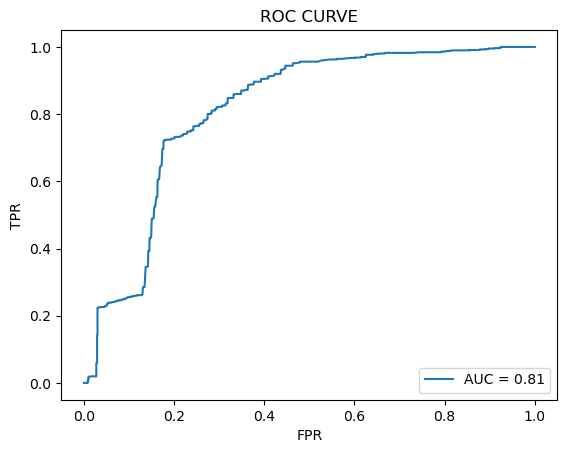

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

y_prob = log_reg.predict_proba(x_test)[ : , 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc)
roc_display.plot()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.show()